### Actividad 4: Comprensión de los datos
Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip install matplotlib seaborn

In [3]:
import matplotlib.pyplot as plt

### Leer la base de datos

In [4]:
data = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### ¿Qué variables presentan datos atípicos?
Crear el boxplot utilizando Seaborn

In [5]:
var = data[['LotFrontage']]

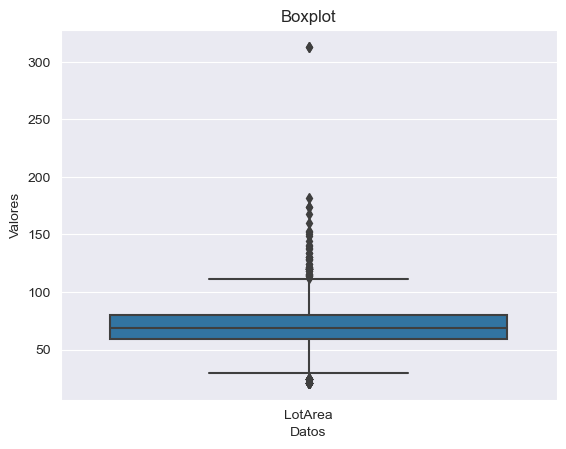

In [6]:
sns.boxplot(data=var)

plt.xticks([0], ['LotArea'])

plt.xlabel('Datos')
plt.ylabel('Valores')
plt.title('Boxplot')

plt.show()



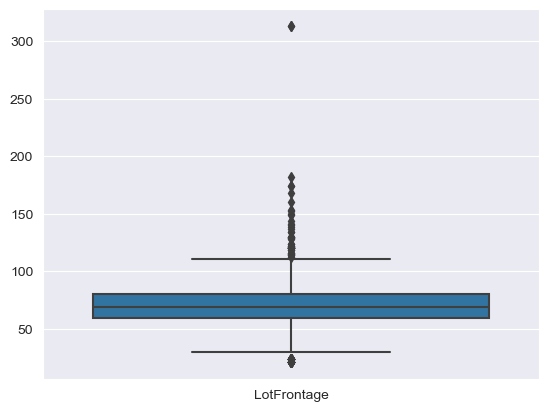

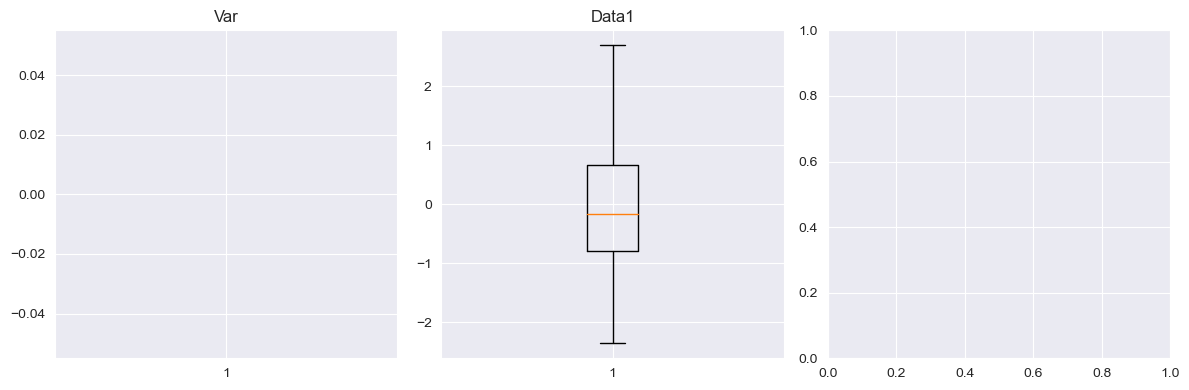

[ 1.01024414  0.94737616 -0.33819918 -0.26925822  0.36640217 -0.64903804
 -1.60392832 -1.18587071  0.41652581  0.49091101  0.83612814 -0.45517314
 -1.28934175 -0.41502021  0.77283677 -0.33619239  0.80125693  2.09260722
  0.62040923  0.94253939 -0.20586417 -0.9897497  -1.42051539 -1.1949314
 -1.5749624   0.48706933  0.08978408  0.84856969  1.85515296 -0.91207648
  1.16969434 -1.69663354 -0.22084557  1.02465954  0.55864362 -1.97884249
 -2.35618739  0.78033547  0.05312058 -0.21835806 -0.18214467  0.07932743
 -1.06655342  1.74436862  1.32759227 -0.58513423  0.1301839  -0.53579248
 -0.02994524  0.53444398 -0.35573055 -0.67575363  0.54619777 -0.49054067
 -1.1692149  -2.21147024  0.90052917 -0.7714681   1.20980195 -0.37173579
 -0.9138456   2.69662797  0.19583088 -1.605791   -0.81777498 -0.28168825
  0.0030839   0.38824933  2.36285791 -0.95436747 -0.49545624 -1.1434301
  0.03251636  0.54040454  0.05672246  1.74028875 -0.29084001  0.31465685
 -0.94703776 -0.40769468  1.15073178 -0.25583126 -0.1

In [7]:

from scipy.stats import norm

# Generar datos aleatorios para los boxplots
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(2, 1, 100)
data3 = np.random.normal(-2, 1, 100)
var = data[['LotFrontage']]
sns.boxplot(data=var)

# Crear una matriz de subgráficos con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Agregar un boxplot a cada subgráfico utilizando la función boxplot de scipy
# La función boxplot de scipy no tiene todos los parámetros de personalización que tiene matplotlib
# Por lo tanto, utilizaremos matplotlib solo para personalización adicional
for ax, data, title in zip(axes, [var,data1], ['Var','Data1']):
    ax.boxplot(data)
    ax.set_title(title)

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()
print(data1)
print(type(var))
print((type(data1)))

### ¿En qué variables identifica un tipo de sesgo?
Creación del histograma

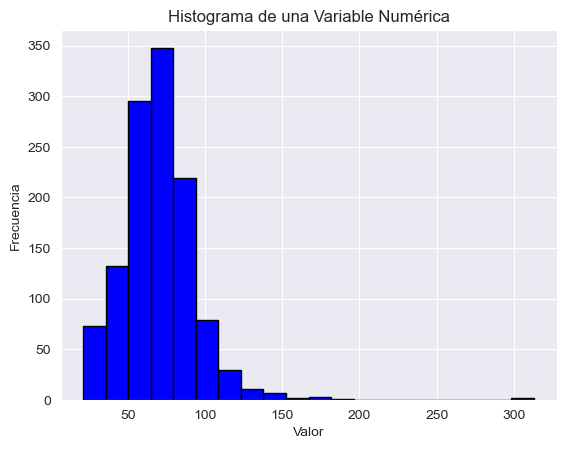

In [8]:
# Crear el histograma
plt.hist(var, bins=20, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de una Variable Numérica')

# Mostrar el histograma
plt.show()

## ¿Sigue una distribución normal cada variable numérica?
### Prueba de Anderson Darling

In [9]:
# num = data.loc[:, data.columns!='MSSubClass']
# numeric = num.select_dtypes(np.number)

In [10]:
var = var.values.tolist()

In [11]:
from scipy.stats import anderson

result = anderson(var, dist='norm')

print("Estadístico A^2:", result.statistic)
print("Valores críticos:", result.critical_values)
print("Niveles de significancia:", result.significance_level)

# Comprobar si rechazamos la hipótesis nula basada en el estadístico A^2 y los valores críticos
alpha = 0.05  # Nivel de significancia
if result.statistic.any() > result.critical_values[2]:  # Utilizamos el valor crítico para alfa = 0.05
    print("Rechazar la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución normal.")


Estadístico A^2: [nan nan nan ... nan nan nan]
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Rechazar la hipótesis nula: Los datos no siguen una distribución normal.
